# Global Power Plant Database
## Project Description
### The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

# Key attributes of the database

The database includes the following indicators:

`country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
`country_long` (text): longer form of the country designation
`name` (text): name or title of the power plant, generally in Romanized form
`gppd_idnr` (text): 10 or 12 character identifier for the power plant
`capacity_mw` (number): electrical generating capacity in megawatts
`latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
`longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
`primary_fuel` (text): energy source used in primary electricity generation or export
`other_fuel1` (text): energy source used in electricity generation or export
`other_fuel2` (text): energy source used in electricity generation or export
`other_fuel3` (text): energy source used in electricity generation or export
 `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
`owner` (text): majority shareholder of the power plant, generally in Romanized form
`source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
`url` (text): web document corresponding to the `source` field
`geolocation_source` (text): attribution for geolocation information
`wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
`year_of_capacity_data` (number): year the capacity information was reported
`generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
`generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
`generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
`generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
`generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
`generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
`generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
`generation_data_source` (text): attribution for the reported generation information
`estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
`estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 
`estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 
`estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 
`estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 
'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013
`estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 
`estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
`estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
`estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 

Fuel Type Aggregation

We define the "Fuel Type" attribute of our database based on common fuel categories. 

# Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
df = pd.read_csv('/Users/sneha/Downloads/database_IND.csv')

In [3]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [5]:
df.shape

(907, 27)

In [6]:
df.describe()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh
count,907.000000,861.000000,861.000000,0.0,527.000000,0.0,519.0,0.0,398.000000,422.000000,434.000000,440.000000,448.000000,0.0,0.0
mean,326.223755,21.197918,77.464907,NaN,1997.091082,NaN,2019.0,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN,NaN
std,590.085456,6.239612,4.939316,NaN,17.082868,NaN,0.0,NaN,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456,NaN,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2019.0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,16.725000,16.773900,74.256200,NaN,1988.000000,NaN,2019.0,NaN,223.557672,176.381063,188.285252,177.874930,193.378250,NaN,NaN
50%,59.200000,21.780000,76.719500,NaN,2001.000000,NaN,2019.0,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,NaN
75%,385.250000,25.512400,79.440800,NaN,2012.000000,NaN,2019.0,NaN,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900,NaN,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2019.0,NaN,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,NaN,NaN


In [7]:
df.isnull().any()

country                     False
country_long                False
name                        False
gppd_idnr                   False
capacity_mw                 False
latitude                     True
longitude                    True
primary_fuel                False
other_fuel1                  True
other_fuel2                  True
other_fuel3                  True
commissioning_year           True
owner                        True
source                      False
url                         False
geolocation_source           True
wepp_id                      True
year_of_capacity_data        True
generation_gwh_2013          True
generation_gwh_2014          True
generation_gwh_2015          True
generation_gwh_2016          True
generation_gwh_2017          True
generation_gwh_2018          True
generation_gwh_2019          True
generation_data_source       True
estimated_generation_gwh     True
dtype: bool

In [8]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

# Dropping columns with more than 900 missing data.

In [45]:
df = df.drop(columns=['other_fuel2','other_fuel3','wepp_id','generation_gwh_2013',
                      'generation_gwh_2019','estimated_generation_gwh'])

df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,...,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,2011.0,...,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,2004.0,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.0,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,2016.0,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,NaN,0.994875,233.596650,865.400000,686.500000,Central Electricity Authority
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.nunique()

country                     1
country_long                1
name                      907
gppd_idnr                 907
capacity_mw               361
latitude                  836
longitude                 827
primary_fuel                8
other_fuel1                 3
commissioning_year         73
owner                     280
source                    191
url                       304
geolocation_source          3
year_of_capacity_data       1
generation_gwh_2014       371
generation_gwh_2015       396
generation_gwh_2016       403
generation_gwh_2017       408
generation_gwh_2018       410
generation_data_source      1
dtype: int64

# Dropping columns with 1 or 907 unique values. 

In [46]:
df = df.drop(columns =['country','country_long','name','gppd_idnr',
                       'year_of_capacity_data','generation_data_source','owner','source','url'])
df

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,NaN,2011.0,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,NaN,WRI,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,NaN,WRI,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,NaN,2004.0,WRI,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,Coal,Oil,2015.0,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,Oil,2016.0,WRI,NaN,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,Solar,NaN,NaN,Industry About,NaN,NaN,NaN,NaN,NaN
904,25.5,15.2758,75.5811,Wind,NaN,NaN,WRI,NaN,NaN,NaN,NaN,NaN
905,80.0,24.3500,73.7477,Coal,NaN,NaN,WRI,NaN,NaN,NaN,NaN,NaN


# Now before handling the rest of the missing dataset, lets see if the columns are co related to each other.

# To impute or handle the Nan values more meaningfully. 

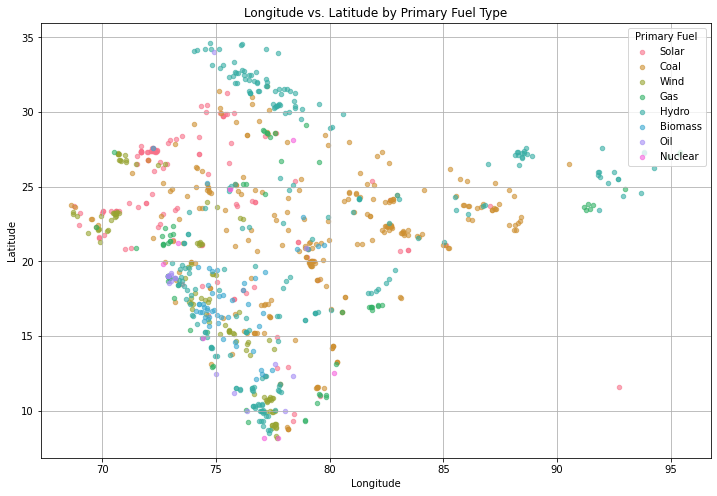

In [12]:
df_plot = df[['primary_fuel', 'longitude', 'latitude']]

# Create a color palette for different primary fuels
fuel_palette = sns.color_palette("husl", n_colors=len(df_plot['primary_fuel'].unique()))

# Create a scatter plot for each primary fuel
plt.figure(figsize=(12, 8))
for i, fuel in enumerate(df_plot['primary_fuel'].unique()):
    subset = df_plot[df_plot['primary_fuel'] == fuel]
    plt.scatter(subset['longitude'], subset['latitude'], label=fuel, color=fuel_palette[i], s=20, alpha=0.6)

# Add labels and legend
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Longitude vs. Latitude by Primary Fuel Type')
plt.legend(title='Primary Fuel', loc='upper right')

# Show the plot
plt.grid(True)
plt.show()

In [47]:
## Dropping null valeus for Longitude and Latitude. 
df = df.dropna(subset=['longitude', 'latitude'])

/var/folders/57/gh5p27812y92gkl08kl8whj40000gn/T/ipykernel_5648/4022450454.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select['primary_fuel'] = df['primary_fuel']
/var/folders/57/gh5p27812y92gkl08kl8whj40000gn/T/ipykernel_5648/4022450454.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select['geolocation_source'] = df['geolocation_source']


geolocation_source  Industry About  National Renewable Energy Laboratory  WRI
primary_fuel                                                                 
Biomass                          0                                     0   50
Coal                             0                                     0  253
Gas                              0                                     0   68
Hydro                            0                                     0  233
Nuclear                          0                                     0    9
Oil                              0                                     0   17
Solar                          119                                     4    0
Wind                             0                                     0  108


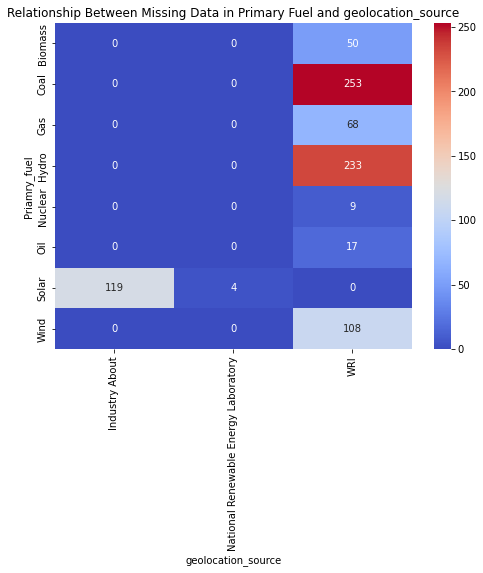

In [14]:
# Create a DataFrame with only the two categorical columns
df_select= df[['primary_fuel', 'geolocation_source']]

# Create binary columns to indicate missing data in each column
df_select['primary_fuel'] = df['primary_fuel']
#df_select['other_fuel1'] = df['other_fuel1']
df_select['geolocation_source'] = df['geolocation_source']
# Create a cross-tabulation to analyze the relationship
cross_tab = pd.crosstab(df_select['primary_fuel'], df_select['geolocation_source'])

# Print the cross-tabulation
print(cross_tab)

# Create a heatmap to visualize the cross-tabulation
plt.figure(figsize=(8, 6))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='coolwarm', cbar=True)
plt.xlabel('geolocation_source')
plt.ylabel('Priamry_fuel')
plt.title('Relationship Between Missing Data in Primary Fuel and geolocation_source')
plt.show()


## Only 4 data is aassociated with Natinal Renewable Energy Laboratory. 
## Only Solar is aassociated with Industury About 
## Rest all other fuels are associated with WRI.

In [15]:
# Create a mapping dictionary based on the cross-tabulation
imputation_map = {
    'Biomass': 'WRI',
    'Coal': 'WRI',
    'Gas': 'WRI',
    'Hydro': 'WRI',
    'Nuclear': 'WRI',
    'Oil': 'WRI',
    'Solar': 'Industry',
    'Wind': 'WRI'
}

# Impute missing values in the "geolocation_source" column based on "primary_fuel"
df['geolocation_source'].fillna(df['primary_fuel'].map(imputation_map), inplace=True)


/var/folders/57/gh5p27812y92gkl08kl8whj40000gn/T/ipykernel_5648/3937318469.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['geolocation_source'].fillna(df['primary_fuel'].map(imputation_map), inplace=True)


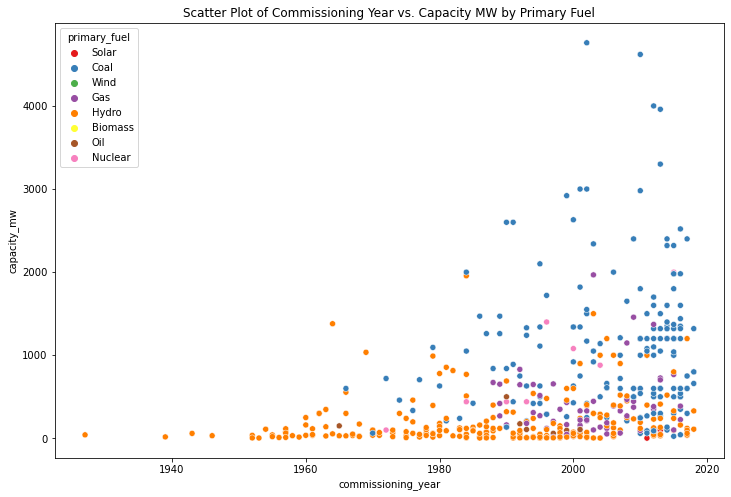

In [16]:
# Scatter plot with primary fuel as hue
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='commissioning_year', y='capacity_mw', hue='primary_fuel', palette='Set1')
plt.title('Scatter Plot of Commissioning Year vs. Capacity MW by Primary Fuel')
plt.show()


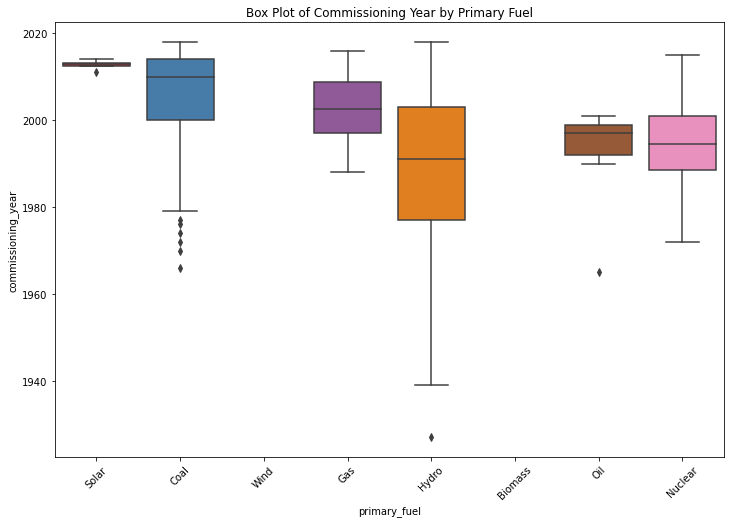

In [17]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='primary_fuel', y='commissioning_year', palette='Set1')
plt.title('Box Plot of Commissioning Year by Primary Fuel')
plt.xticks(rotation=45)
plt.show()


In [48]:

mode_by_primary_fuel = df.groupby('primary_fuel')['commissioning_year'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

# Impute missing commissioning_year values based on primary_fuel
df['commissioning_year'] = df.apply(lambda row: mode_by_primary_fuel[row['primary_fuel']] if pd.isna(row['commissioning_year']) else row['commissioning_year'], axis=1)


/var/folders/57/gh5p27812y92gkl08kl8whj40000gn/T/ipykernel_5648/2940677287.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['commissioning_year'] = df.apply(lambda row: mode_by_primary_fuel[row['primary_fuel']] if pd.isna(row['commissioning_year']) else row['commissioning_year'], axis=1)


In [19]:
mode_by_primary_fuel

primary_fuel
Biomass       NaN
Coal       2015.0
Gas        2001.0
Hydro      2017.0
Nuclear    1972.0
Oil        2001.0
Solar      2013.0
Wind          NaN
Name: commissioning_year, dtype: float64

In [49]:

df = df[~df['primary_fuel'].isin(['Biomass', 'Wind'])]


In [50]:
df.isnull().sum()

capacity_mw              0
latitude                 0
longitude                0
primary_fuel             0
other_fuel1            510
commissioning_year       0
geolocation_source       0
generation_gwh_2014    311
generation_gwh_2015    289
generation_gwh_2016    279
generation_gwh_2017    275
generation_gwh_2018    267
dtype: int64

In [22]:
generation_columns = [
    'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
    'generation_gwh_2017', 'generation_gwh_2018'
]

df_selected = df[['primary_fuel', 'capacity_mw'] + generation_columns]


In [23]:
df_selected.corr()

,capacity_mw,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
capacity_mw,1.000000,0.838272,0.843761,0.869947,0.885925,0.901306
generation_gwh_2014,0.838272,1.000000,0.960903,0.936739,0.912093,0.902280
generation_gwh_2015,0.843761,0.960903,1.000000,0.975077,0.940054,0.934242
generation_gwh_2016,0.869947,0.936739,0.975077,1.000000,0.971936,0.961863
generation_gwh_2017,0.885925,0.912093,0.940054,0.971936,1.000000,0.985776
generation_gwh_2018,0.901306,0.902280,0.934242,0.961863,0.985776,1.000000


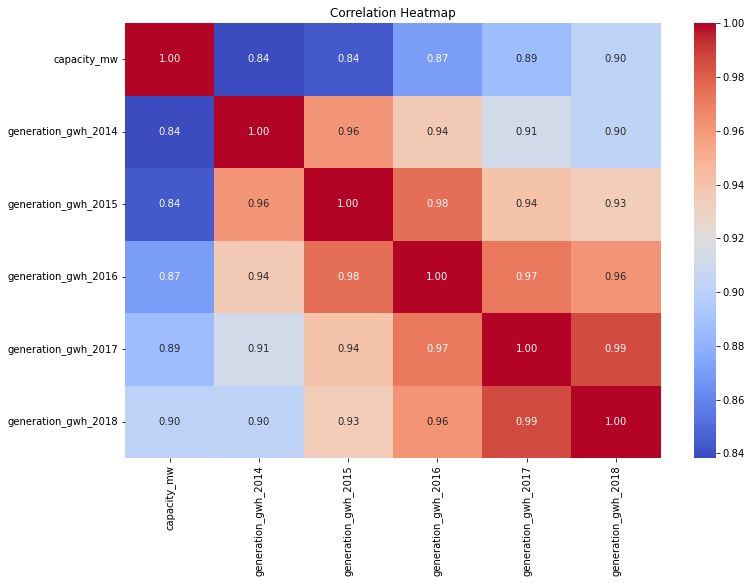

In [24]:
correlation_matrix = df_selected.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


## There is a positive correlation between "capacity_mw" and "generation_gwh" for each of the years 2014 to 2018. This suggests that as the installed capacity (in megawatts) increases, the generation of electricity (in gigawatt-hours) tends to increase as well, which is expected.
## The strength of the correlation appears to be relatively high, with coefficients close to 1, indicating a strong positive relationship between capacity and generation.
## The correlations between "generation_gwh" in different years (e.g., 2014 vs. 2015) are also positive, suggesting that generation tends to be positively correlated across consecutive years.
## The highest correlation is observed between "generation_gwh_2018" and "generation_gwh_2017," indicating a strong positive relationship between generation in 2018 and 2017.
## There are 2 ways : I can go with : Either drop all the columns but 1 OR I can get the mean value. 
## Mean Value might not be feasible as most of the values are missing. So, I am deciding to keep 1 column with least missing values i.e. generation_gwh_2018

In [51]:
df = df.drop(columns=['generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017'])

In [40]:
df.isnull().sum()

capacity_mw              0
latitude                 0
longitude                0
primary_fuel             0
other_fuel1            238
commissioning_year       0
geolocation_source       0
generation_gwh_2018      0
dtype: int64

## Now, to impute the generation_gwh_2018 missing values , I will combine : Commissioning year and try to impute the mean values.

In [52]:
# Step 1: Calculate the mean "generation_growth_2018" for each unique combination
mean_generation_growth_2018 = df.groupby(['commissioning_year', 'primary_fuel'])['generation_gwh_2018'].transform('mean')

# Step 2: Impute missing "generation_growth_2018" with the calculated means
df['generation_gwh_2018'].fillna(mean_generation_growth_2018, inplace=True)


In [28]:
mean_generation_growth_2018

0              NaN
1      4898.515765
3       626.239128
4      4898.515765
5      2163.186125
          ...     
899    3057.210199
901       0.000000
902    3217.368105
903            NaN
905    4898.515765
Name: generation_gwh_2018, Length: 703, dtype: float64

## Yet there are some null values left. I'll drop them now. 

In [53]:
df  = df.dropna(subset=['generation_gwh_2018'])

In [32]:
# 1. Primary fuel :

df['primary_fuel'].value_counts()

Coal       253
Hydro      229
Gas         68
Oil         16
Nuclear      9
Name: primary_fuel, dtype: int64

In [33]:
df['other_fuel1'].value_counts()

Oil             190
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64

/var/folders/57/gh5p27812y92gkl08kl8whj40000gn/T/ipykernel_5648/579515022.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select['primary_fuel'] = df['primary_fuel']
/var/folders/57/gh5p27812y92gkl08kl8whj40000gn/T/ipykernel_5648/579515022.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select['other_fuel1'] = df['other_fuel1']


other_fuel1   Cogeneration  Gas  Oil
primary_fuel                        
Coal                     1    0  183
Gas                      0    0    7
Oil                      0    2    0


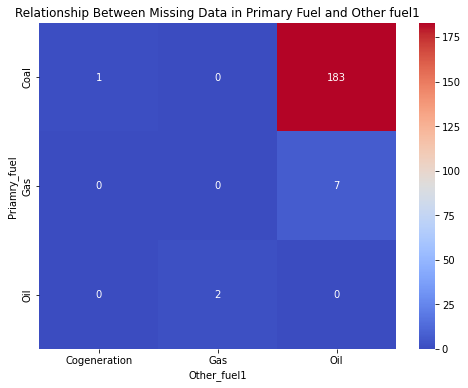

In [34]:
# Create a DataFrame with only the two categorical columns
df_select= df[['primary_fuel', 'other_fuel1']]

# Create binary columns to indicate missing data in each column
df_select['primary_fuel'] = df['primary_fuel']
df_select['other_fuel1'] = df['other_fuel1']
# Create a cross-tabulation to analyze the relationship
cross_tab = pd.crosstab(df_select['primary_fuel'], df_select['other_fuel1'])

# Print the cross-tabulation
print(cross_tab)

# Create a heatmap to visualize the cross-tabulation
plt.figure(figsize=(8, 6))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='coolwarm', cbar=True)
plt.xlabel('Other_fuel1')
plt.ylabel('Priamry_fuel')
plt.title('Relationship Between Missing Data in Primary Fuel and Other fuel1')
plt.show()


## "Coal" power plants are often associated with "Oil" as an additional fuel type in your dataset. Oil is associated with Gas.
## Let's See that 1 row which ha Cogeneration. 

In [54]:
# Filter rows where "Other_fuel1" is "Cogeneration"
cogeneration_rows = df[df['other_fuel1'] == 'Cogeneration']
cogeneration_rows

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,geolocation_source,generation_gwh_2018
811,260.0,15.1839,76.6622,Coal,Cogeneration,1999.0,WRI,1221.5


In [55]:

df = df[df['other_fuel1'] != 'Cogeneration']

In [56]:

# Map "coal" to "gas" and "gas" to "coal" in "Other_fuel1" when "primary_fuel" is "coal" or "gas"
df['other_fuel1'] = df.apply(lambda row: 'Oil' if row['primary_fuel'] in ['Coal', 'Gas'] else row['other_fuel1'], axis=1)

# Map "oil" to "gas" in "Other_fuel1" when "primary_fuel" is "oil"
df['other_fuel1'] = df.apply(lambda row: 'Gas' if row['primary_fuel'] == 'Oil' else row['other_fuel1'], axis=1)


In [57]:
df  = df.dropna(subset=['other_fuel1'])

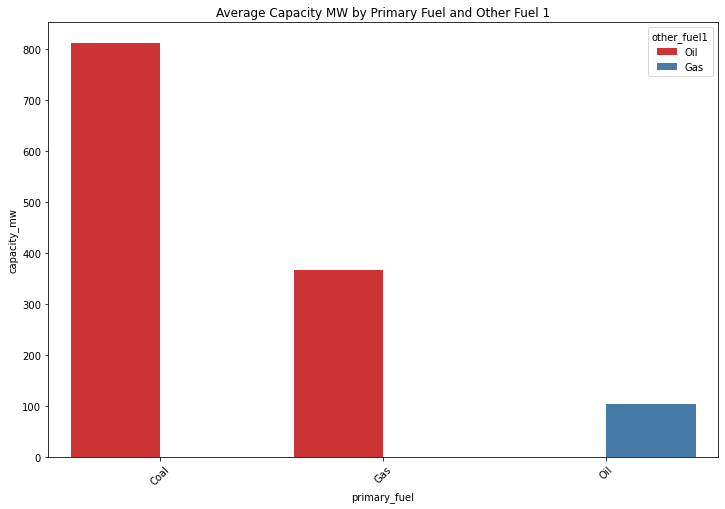

In [58]:

plt.figure(figsize=(12, 8))
sns.barplot(data=df, x='primary_fuel', y='capacity_mw', hue='other_fuel1', ci=None, palette='Set1')
plt.title('Average Capacity MW by Primary Fuel and Other Fuel 1')
plt.xticks(rotation=45)
plt.show()

A high positive correlation between "capacity_mw" and the generation columns indicates that power plants with greater capacity tend to generate more electricity. This relationship is intuitive, as larger power plants are typically capable of producing more electricity.

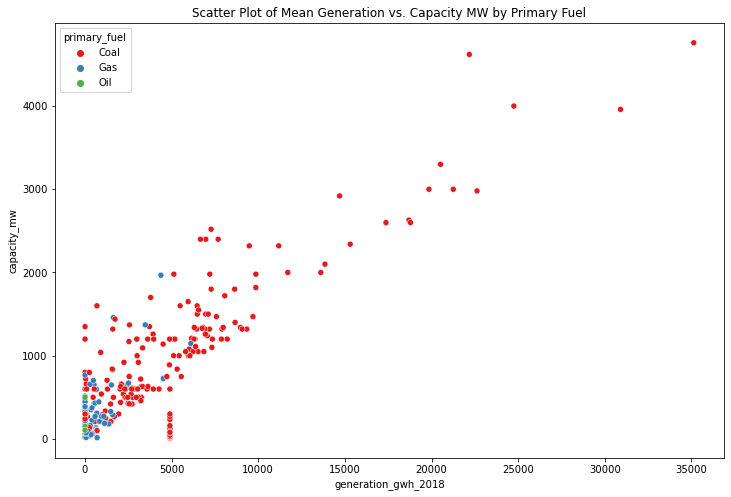

In [61]:

plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='generation_gwh_2018', y='capacity_mw', hue='primary_fuel', palette='Set1')
plt.title('Scatter Plot of Mean Generation vs. Capacity MW by Primary Fuel')
plt.show()


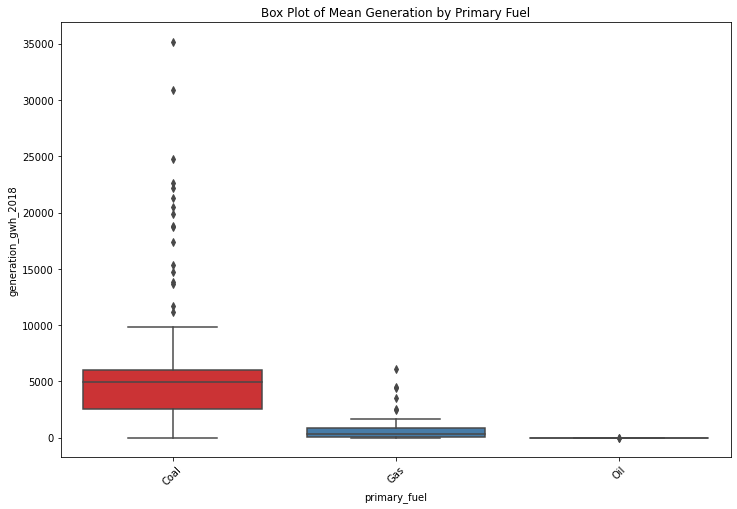

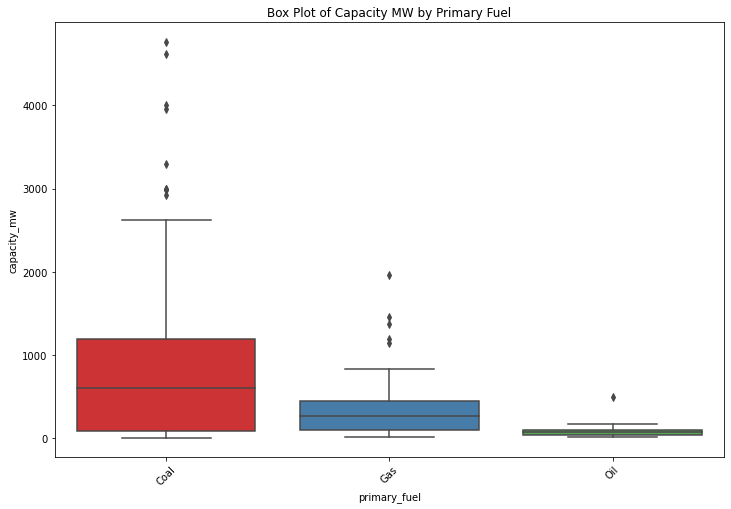

In [63]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='primary_fuel', y='generation_gwh_2018', palette='Set1')
plt.title('Box Plot of Mean Generation by Primary Fuel')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='primary_fuel', y='capacity_mw', palette='Set1')
plt.title('Box Plot of Capacity MW by Primary Fuel')
plt.xticks(rotation=45)
plt.show()


In [66]:
df.nunique()

capacity_mw            188
latitude               327
longitude              326
primary_fuel             3
other_fuel1              2
commissioning_year      46
geolocation_source       1
generation_gwh_2018    219
dtype: int64

In [67]:
df=df.drop(columns=['geolocation_source'])

In [69]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# List of categorical columns to encode
categorical_columns = ['primary_fuel','other_fuel1']

# Apply label encoding to each categorical column
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])


In [70]:
df.corr()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,generation_gwh_2018
capacity_mw,1.000000,0.097684,0.103010,-0.276900,0.165390,-0.023506,0.783376
latitude,0.097684,1.000000,0.109405,-0.209084,0.162671,0.070602,0.112234
longitude,0.103010,0.109405,1.000000,-0.191818,0.190094,-0.027941,0.069938
primary_fuel,-0.276900,-0.209084,-0.191818,1.000000,-0.690089,-0.317017,-0.405417
other_fuel1,0.165390,0.162671,0.190094,-0.690089,1.000000,0.216099,0.191979
commissioning_year,-0.023506,0.070602,-0.027941,-0.317017,0.216099,1.000000,0.093641
generation_gwh_2018,0.783376,0.112234,0.069938,-0.405417,0.191979,0.093641,1.000000


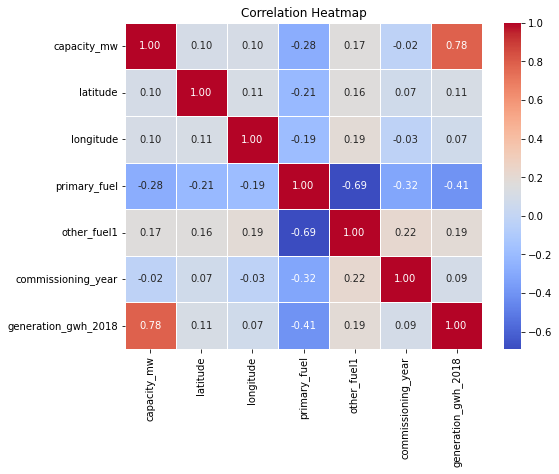

In [71]:

plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [72]:
variance_df = df.var()

# Display the variance for each column
print(variance_df)

capacity_mw            6.265677e+05
latitude               2.382254e+01
longitude              2.435672e+01
primary_fuel           3.051883e-01
other_fuel1            4.548685e-02
commissioning_year     1.065597e+02
generation_gwh_2018    2.149052e+07
dtype: float64


# Model 1 :
Classification Model to Predict Primary_fuel : 

In [74]:
X = df.drop(columns=['primary_fuel'])
y = df['primary_fuel']

In [75]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit and transform the numerical columns
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

In [76]:

from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier to the data
rf_classifier.fit(X, y)

# Get feature importances
feature_importances = pd.Series(rf_classifier.feature_importances_, index=X.columns)

# Sort feature importances in descending order
sorted_feature_importances = feature_importances.sort_values(ascending=False)

# Print or visualize the sorted feature importances
print(sorted_feature_importances)


generation_gwh_2018    0.301951
commissioning_year     0.180635
longitude              0.155545
other_fuel1            0.135287
capacity_mw            0.123385
latitude               0.103196
dtype: float64


(336, 4) (268, 4) (68, 4)
MODEL NAME :  LogisticRegression() 

               precision    recall  f1-score   support

           0       0.84      0.93      0.88        45
           1       0.77      0.56      0.65        18
           2       1.00      1.00      1.00         5

    accuracy                           0.84        68
   macro avg       0.87      0.83      0.84        68
weighted avg       0.83      0.84      0.83        68
 





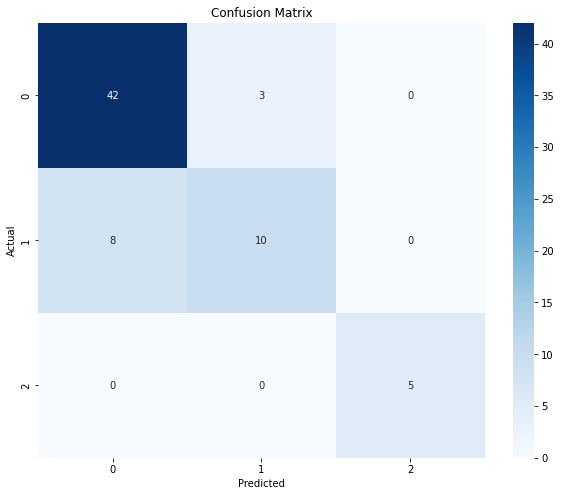

Precision: 0.8330316742081447
Recall: 0.8382352941176471
F1-Score: 0.8294467192649556


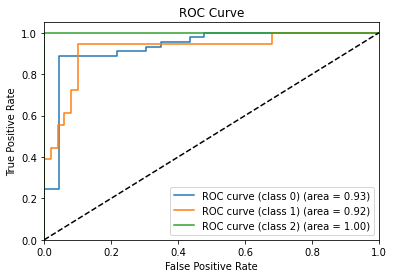

MODEL NAME :  KNeighborsClassifier(n_neighbors=3) 

               precision    recall  f1-score   support

           0       0.92      0.98      0.95        45
           1       0.93      0.78      0.85        18
           2       1.00      1.00      1.00         5

    accuracy                           0.93        68
   macro avg       0.95      0.92      0.93        68
weighted avg       0.93      0.93      0.92        68
 





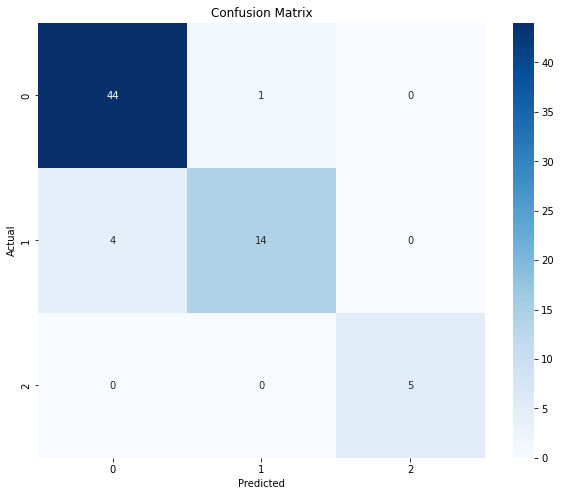

Precision: 0.9272058823529411
Recall: 0.9264705882352942
F1-Score: 0.9243143005002589


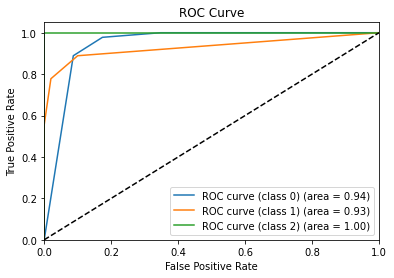

MODEL NAME :  DecisionTreeClassifier(criterion='entropy', random_state=7) 

               precision    recall  f1-score   support

           0       0.86      0.96      0.91        45
           1       0.85      0.61      0.71        18
           2       1.00      1.00      1.00         5

    accuracy                           0.87        68
   macro avg       0.90      0.86      0.87        68
weighted avg       0.87      0.87      0.86        68
 





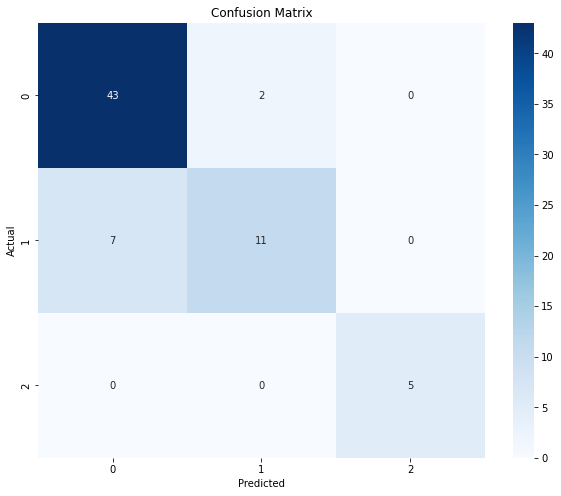

Precision: 0.8666289592760181
Recall: 0.8676470588235294
F1-Score: 0.8604564066713273


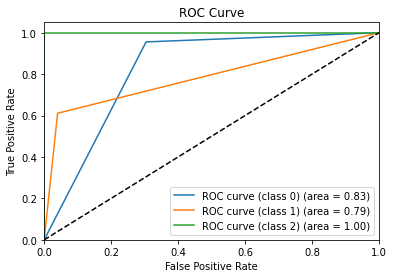

MODEL NAME :  RandomForestClassifier() 

               precision    recall  f1-score   support

           0       0.88      1.00      0.94        45
           1       1.00      0.67      0.80        18
           2       1.00      1.00      1.00         5

    accuracy                           0.91        68
   macro avg       0.96      0.89      0.91        68
weighted avg       0.92      0.91      0.91        68
 





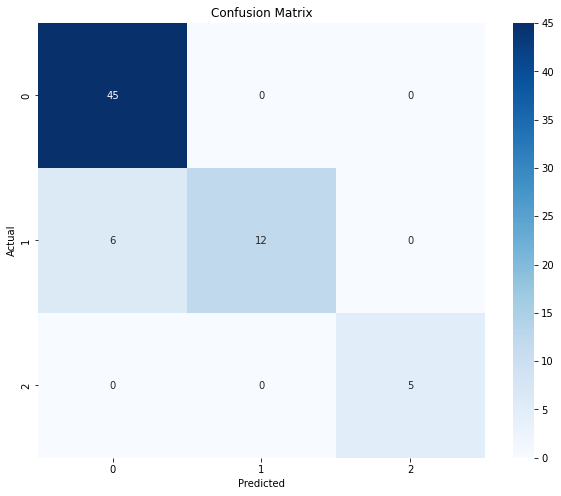

Precision: 0.9221453287197231
Recall: 0.9117647058823529
F1-Score: 0.9056985294117647


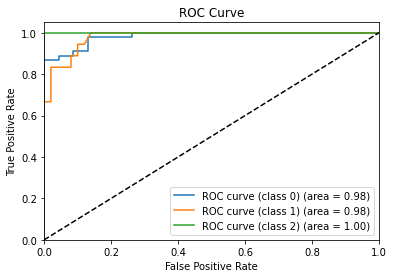

MODEL NAME :  GaussianNB() 

               precision    recall  f1-score   support

           0       0.91      0.96      0.93        45
           1       0.88      0.78      0.82        18
           2       1.00      1.00      1.00         5

    accuracy                           0.91        68
   macro avg       0.93      0.91      0.92        68
weighted avg       0.91      0.91      0.91        68
 





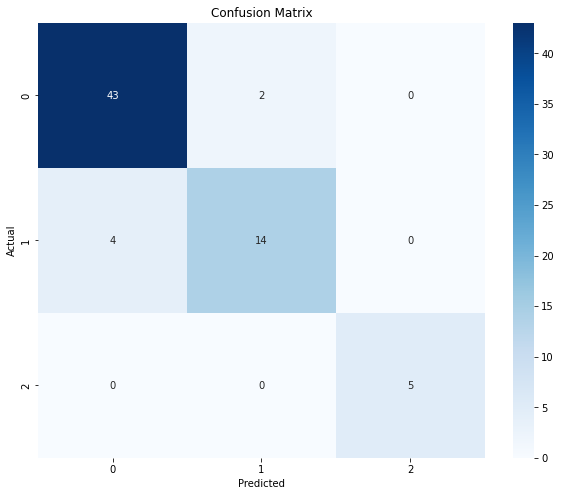

Precision: 0.9105913642052565
Recall: 0.9117647058823529
F1-Score: 0.9101286294568979


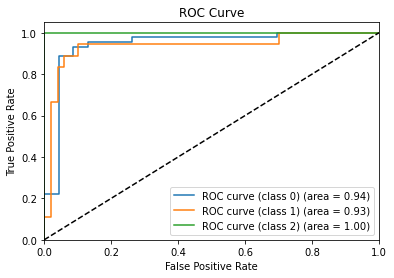

,Model,Model_score,Accuracy
0,Logistic_Regression,0.873134,0.838235
1,KNN Classifier,0.936567,0.926471
2,Decision Tree Classifier,1.000000,0.867647
3,Random Forest Classifier,1.000000,0.911765
4,GaussianNB,0.917910,0.911765


In [103]:
X_data = X_scaled_df.drop(columns=['latitude','capacity_mw'])

from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix, classification_report
from sklearn.preprocessing import label_binarize
from sklearn.ensemble import RandomForestClassifier

# Create an instance of the RandomForestRegressor
#rf = RandomForestClassifier(random_state=42)
from sklearn.model_selection import train_test_split


X_train,X_test,Y_train,Y_test = train_test_split(X_data, y, test_size=0.2, random_state =42)

print(X_data.shape, X_train.shape, X_test.shape)

## Creating a pipeline of Models 

from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier


from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.naive_bayes import GaussianNB

model_pipeline = []    ### create a pipeline model_pipeline

### Append the models and make some necessary updates to their parameters for better model performance.

model_pipeline.append(LogisticRegression())

model_pipeline.append(KNeighborsClassifier(n_neighbors=3))

model_pipeline.append(DecisionTreeClassifier(criterion='entropy',random_state=7))

model_pipeline.append(RandomForestClassifier())

model_pipeline.append(GaussianNB())

model_score = []
acc_list = []
f1_list=[]
prec_list=[]
recall_list=[]
##  Fit X train and Y Train to the models in pipeline 

for model in model_pipeline:
    model.fit(X_train,Y_train)    
    y_pred = model.predict(X_test)
    
    model_score.append(model.score(X_train,Y_train))
    
    acc_list.append(metrics.accuracy_score(Y_test,y_pred))
    
    print("MODEL NAME : ",model,"\n\n",classification_report(Y_test,y_pred),"\n\n\n")
    
    # Create a confusion matrix
    cm = confusion_matrix(Y_test, y_pred)

# Plot the confusion matrix using a heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=np.unique(Y_test), yticklabels=np.unique(Y_test))
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    precision = precision_score(Y_test,y_pred,average='weighted')
    recall = recall_score(Y_test,y_pred,average='weighted')
    f1 = f1_score(Y_test,y_pred,average='weighted')


   
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-Score:", f1)

# Convert the multiclass labels to binary
    y_test_binarized = label_binarize(Y_test, classes=np.unique(Y_test))

# Assuming y_pred_0 contains the predicted class probabilities
    y_pred_probs = model.predict_proba(X_test)

# Compute ROC curve and AUC for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(len(np.unique(Y_test))):
        fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_probs[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
    plt.figure()

    for i in range(len(np.unique(Y_test))):
        plt.plot(fpr[i], tpr[i], label='ROC curve (class {}) (area = {:.2f})'.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()


model_list=['Logistic_Regression','KNN Classifier','Decision Tree Classifier','Random Forest Classifier','GaussianNB']

score_list = pd.DataFrame({'Model':model_list, 'Model_score':model_score, 'Accuracy': acc_list})
score_list

## From above I conclude that KNN Classifier shows better results with less Overfitting. 
With Accuracy 92%. 

In [85]:
## Model 2 : Regression Model 

X_reg = df.drop(columns=['capacity_mw'])
y_reg = df['capacity_mw']

In [89]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit and transform the numerical columns
X_scaled_reg = scaler.fit_transform(X_reg)
X_scaled_reg_df = pd.DataFrame(X_scaled_reg, columns=X_reg.columns)

In [92]:
from sklearn.ensemble import RandomForestRegressor
X_train, X_test, y_train, y_test = train_test_split(X_scaled_reg_df, y_reg, train_size=0.8, random_state=42)
# Instantiate the Random Forest Regressor model
model = RandomForestRegressor()

# Fit the model to your data
model.fit(X_train, y_train)  # X_train contains your feature data, and y_train contains the AveragePrice values

# Get feature importances
feature_importances = model.feature_importances_

# Sort feature importances in descending order and get the corresponding feature names
sorted_feature_importances = sorted(zip(feature_importances, X_train.columns), reverse=True)

# Print or plot feature importances
for importance, feature_name in sorted_feature_importances:
    print(f"Feature: {feature_name}, Importance: {importance}")

Feature: generation_gwh_2018, Importance: 0.8731556470512258
Feature: longitude, Importance: 0.04662419281659413
Feature: commissioning_year, Importance: 0.04206949215524783
Feature: latitude, Importance: 0.034880451837653696
Feature: primary_fuel, Importance: 0.003085695548908028
Feature: other_fuel1, Importance: 0.00018452059037042532


Model: Linear Regression
Mean Squared Error: 168174.17
R-squared: 0.77
----------------------------------------


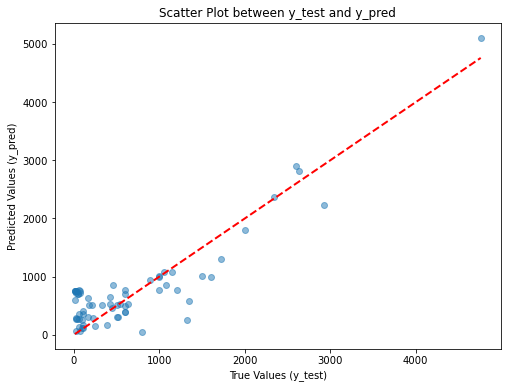

Model: Decision Tree Regressor
Mean Squared Error: 142299.40
R-squared: 0.81
----------------------------------------


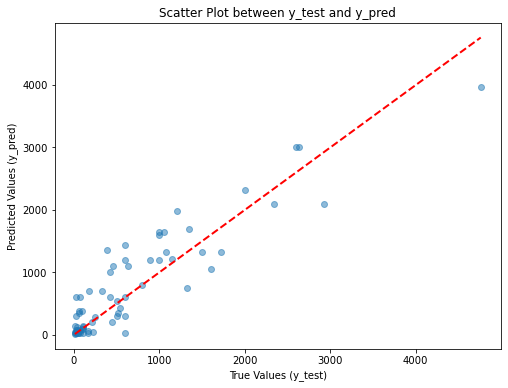

Model: Random Forest Regressor
Mean Squared Error: 80799.65
R-squared: 0.89
----------------------------------------


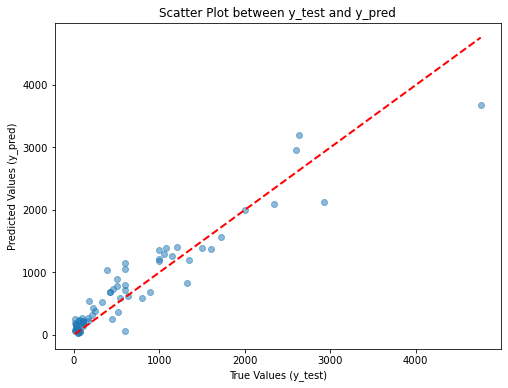

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics

X_data = X_scaled_reg_df.drop(columns=['primary_fuel','other_fuel1','latitude'])
X_train, X_test, y_train, y_test = train_test_split(X_scaled_reg_df, y_reg, train_size=0.8, random_state=42)
# Step 2: Define a list of regression models to evaluate
models = [
    ("Linear Regression", LinearRegression()),
    ("Decision Tree Regressor", DecisionTreeRegressor(random_state=42)),
    ("Random Forest Regressor", RandomForestRegressor(random_state=42))
]

# Step 3: Loop through the models, train, and evaluate
for model_name, model in models:
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate performance metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    
    # Print the results
    
    print(f"Model: {model_name}")
    
    print(f"Mean Squared Error: {mse:.2f}")
    
    print(f"R-squared: {r2:.2f}")
 
    print("-" * 40)
    
    # Initialize a scatter plot
    plt.figure(figsize=(8, 6))

# Scatter plot between y_pred and y_test
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.title("Scatter Plot between y_test and y_pred")
    plt.xlabel("True Values (y_test)")
    plt.ylabel("Predicted Values (y_pred)")
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
    plt.show()
# Show the plot


# Random Forest Regressor Gives the best result with 89% accuracy. 